In [4]:
from solartwins import *
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 12
fig_size[1] = 9
plt.rcParams["figure.figsize"] = fig_size

In [7]:
hip10175 = find_stellar_abundances('HIP10175')
xt= np.array(hip10175.columns[3])
ya = np.array(hip10175.columns[1])
ze = np.array(hip10175.columns[2])
ya

array([-0.028     ,  0.024     , -0.051     , -0.006     , -0.034     ,
       -0.01      ,  0.002     ,  0.023     , -0.002     , -0.029     ,
       -0.028     , -0.041     , -0.056     , -0.048     ,  0.081     ,
        0.066     ,  0.087     ,  0.116     ,  0.118     ,  0.104     ,
        0.17      ,  0.127     ,  0.057     ,  0.089     ,  0.08      ,
        0.065     , -0.05176923,  0.012     , -0.019     ,  0.00775   ])

In [5]:
t

star_name,age,age_err,Fe,Fe_err,O,O_err,Na,Na_err,Mg,Mg_err,Al,Al_err,Si,Si_err,S,S_err,Ca,Ca_err,V,V_err,Mn,Mn_err,Co,Co_err,Ni,Ni_err,Cu,Cu_err,Zn,Zn_err,Sr,Sr_err,Y,Y_err,Zr,Zr_err,Ba,Ba_err,La,La_err,Ce,Ce_err,Pr,Pr_err,Nd,Nd_err,Sm,Sm_err,Eu,Eu_err,Gd,Gd_err,Dy,Dy_err,C,C_err,Ti,Ti_err,Sc,Sc_err,Cr,Cr_err
bytes9,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
HIP10175,3.2,0.4,-0.028,0.002,0.024,0.009,-0.051000000000000004,0.022,-0.006000000000000002,0.007,-0.034,0.008,-0.009999999999999998,0.003,0.0020000000000000018,0.012,0.023,0.005,-0.0019999999999999983,0.004,-0.029,0.005,-0.028,0.004,-0.04100000000000001,0.003,-0.05600000000000001,0.013,-0.048,0.006,0.081,0.005,0.066,0.007,0.087,0.012,0.11599999999999999,0.005,0.118,0.029,0.104,0.016,0.16999999999999998,0.008,0.127,0.01,0.057,0.013,0.089,0.005,0.08,0.005,0.065,0.005,-0.05176923076923076,0.013000000000000001,0.012,0.01,-0.019000000000000003,0.020999999999999998,0.007750000000000001,0.012
HIP101905,1.2,0.3,0.088,0.004,-0.06899999999999999,0.014,-0.093,0.012,-0.025999999999999995,0.008,-0.033999999999999996,0.002,-0.024999999999999994,0.004,-0.104,0.027,0.024000000000000007,0.005,0.0050000000000000044,0.009,-0.04599999999999999,0.006,-0.03799999999999999,0.005,-0.03799999999999999,0.005,-0.08499999999999999,0.031,-0.09699999999999999,0.016,0.097,0.006,0.08100000000000002,0.011,0.08499999999999999,0.01,0.14,0.01,0.10200000000000001,0.031,0.119,0.012,0.094,0.014,0.131,0.01,0.05399999999999999,0.021,0.07600000000000001,0.014,0.049000000000000016,0.006,0.066,0.066,-0.11374193548387096,0.031,0.009076923076923078,0.013000000000000001,-0.008058823529411757,0.017,-0.004749999999999994,0.016
HIP102040,2.4,0.4,-0.08,0.003,0.022,0.006,-0.071,0.008,0.0020000000000000018,0.003,-0.021000000000000005,0.008,-0.0040000000000000036,0.005,-0.06499999999999999,0.014,0.034,0.005,0.0,0.006,-0.06299999999999999,0.005,-0.012999999999999998,0.007,-0.03799999999999999,0.004,-0.06599999999999999,0.034,-0.077,0.02,0.062,0.005,0.054000000000000006,0.007,0.081,0.011,0.128,0.012,0.118,0.018,0.14900000000000002,0.016,0.158,0.01,0.165,0.011,0.113,0.023,0.14600000000000002,0.017,0.094,0.006,0.108,0.028,-0.019789473684210527,0.056999999999999995,0.029545454545454552,0.011,0.0178,0.034999999999999996,-0.007249999999999993,0.016
HIP102152,8.6,0.3,-0.016,0.003,0.051000000000000004,0.01,-0.027999999999999997,0.014,0.031,0.01,0.026000000000000002,0.004,0.003000000000000001,0.003,-0.012,0.022,0.006,0.005,-0.009000000000000001,0.006,-0.026999999999999996,0.005,-0.018000000000000002,0.008,-0.017,0.004,0.002,0.004,0.004,0.011,-0.11,0.005,-0.104,0.007,-0.094,0.012,-0.049,0.009,-0.062,0.019,-0.023,0.013,0.0,0.017,0.0010000000000000009,0.009,0.015,0.01,0.023,0.019,0.028,0.005,-0.031,0.027,0.001285714285714285,0.014,0.0035454545454545456,0.011,-0.00975,0.016,-0.002230769230769232,0.013
HIP10303,5.8,0.4,0.104,0.003,-0.022999999999999993,0.007,-0.0020000000000000018,0.012,0.017,0.005,0.033000000000000015,0.004,0.0040000000000000036,0.002,-0.023999999999999994,0.014,0.0050000000000000044,0.003,0.015,0.006,0.019000000000000003,0.004,0.0,0.005,0.020000000000000004,0.004,0.013999999999999999,0.021,0.0040000000000000036,0.02,0.032000000000000015,0.005,0.019000000000000003,0.006,0.0040000000000000036,0.014,-0.01999999999999999,0.008,-0.031,0.006,-0.027999999999999997,0.015,0.008000000000000007,0.012,-0.013999999999999999,0.007,-0.010999999999999996,0.016,0.01100000000000001,0.013,0.030000000000000013,0.005,-0.0049999999999999906,0.021,-0.033571428571428565,0.007,0.009727272727272737,0.

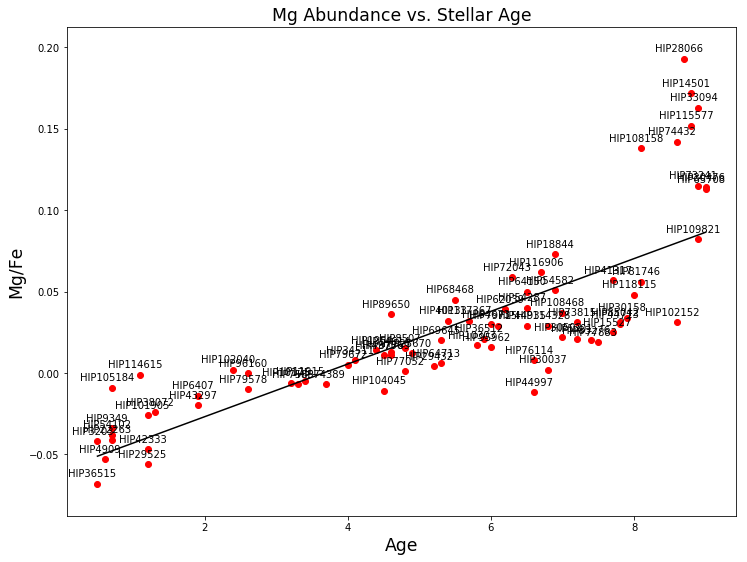

In [6]:
#plot of star age vs Mg abundance from above table - before removing temp trends

plt.scatter(t['age'], t['Mg'], c='r') 
plt.xlabel('Age',fontsize='xx-large')
plt.ylabel('Mg/Fe', fontsize='xx-large')
plt.title('Mg Abundance vs. Stellar Age', fontsize='xx-large')
plt.plot(np.unique(t['age']), np.poly1d(np.polyfit(t['age'], t['Mg'], 1))(np.unique(t['age'])), color='black')

for i, txt in enumerate(t['star_name']): 
        plt.annotate(txt, xy=(t['age'][i], t['Mg'][i]), xytext=(-5,5), 
            textcoords='offset points', ha='center', va='bottom')

In [8]:
mgabundances = []
for l in (t['star_name']):
    mgabundances.append(residuals(l)[3])

In [9]:
MgTable = Table([t['star_name'], mgabundances,t['Mg_err'], t['age']], names=('Star', 'Mg Corrected Abundance',
                                                                             'Mg Error','Stellar Age'))
MgTable

Star,Mg Corrected Abundance,Mg Error,Stellar Age
bytes9,float64,float64,float64
HIP10175,-0.010592193141106206,0.007,3.2
HIP101905,-0.022250923621552607,0.008,1.2
HIP102040,0.003778483908256261,0.003,2.4
HIP102152,0.04159179789726643,0.01,8.6
HIP10303,-0.0009007376930287546,0.005,5.8
HIP104045,-0.013693274406754496,0.004,4.5
HIP105184,-0.025509905765463962,0.009,0.7
HIP108158,0.09297064853294022,0.011,8.1
HIP108468,0.05109350006802024,0.01,7.0


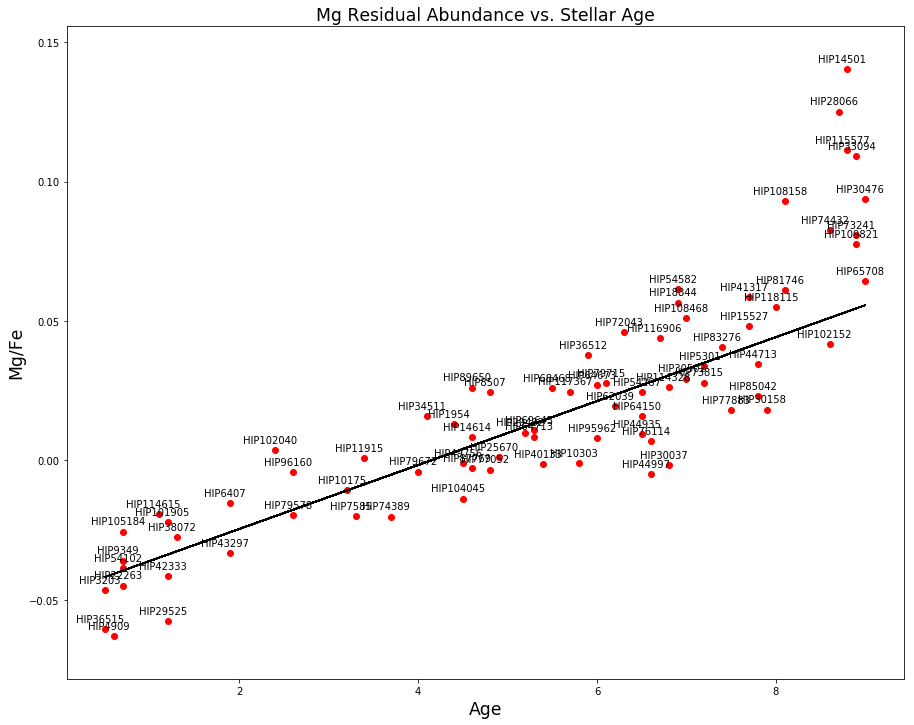

In [10]:
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 15
fig_size[1] = 12
plt.rcParams["figure.figsize"] = fig_size

plt.scatter(MgTable['Stellar Age'], MgTable['Mg Corrected Abundance'], c='r') 
plt.xlabel('Age',fontsize='xx-large')
plt.ylabel('Mg/Fe', fontsize='xx-large')
plt.title('Mg Residual Abundance vs. Stellar Age', fontsize='xx-large')

fmb = find_m_b(MgTable['Stellar Age'], MgTable['Mg Corrected Abundance'], MgTable['Mg Error'])
m = fmb[0]
b = fmb[1]

plt.plot(MgTable['Stellar Age'], m * MgTable['Stellar Age'] + b, color='black') 

for i, txt in enumerate(MgTable['Star']): 
        plt.annotate(txt, xy=(MgTable['Stellar Age'][i], MgTable['Mg Corrected Abundance'][i]), xytext=(-5,5), 
            textcoords='offset points', ha='center', va='bottom')